[111.84810783 277.32244686  -3.9839295  442.7967859  608.27112494
 773.74546397]


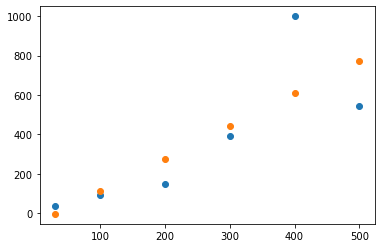

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

# Sample data
X = np.array([[100], [200], [30],[300], [400], [500]])
y = np.array([90, 150, 35,390, 1000, 545])
# Create a Linear Regression model 
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)
# Predict using the trained model
X_test = np.array([[100], [200], [30],[300], [400], [500]])
y_pred = model.predict(X_test)
# Print the predicted values
print(y_pred)

#  plotting 
plt.scatter(X,y)
plt.scatter(X_test,y_pred)
plt.show()


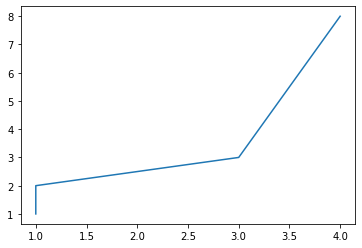

In [2]:
# importing matplotlib module
from matplotlib import pyplot as plt
# x -axis values
x=[1,1,3,4]
# y-axis values
y=[1,2,3,8]
#  function to plot 
plt.plot(x,y)
# function to show the plot
plt.show()

In [4]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Sample data
X = np.array([[2, 3], [4, 5], [1, 2], [6, 7]])
y = np.array([0, 1, 0, 1])

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model to the data
model.fit(X, y)

# Predict using the trained model
X_test = np.array([[5, 8], [5, 6]])
y_pred = model.predict(X_test)

# Print the predicted labels
print(y_pred)


[1 1]


In [11]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

# Sample training data
texts = ["I love dogs", "I hate cats", "Dogs are great", "Cats are cute"]
labels = ["dog", "cat", "dog", "cat"]

# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Create a Logistic Regression classifier
model = LogisticRegression()

# Fit the model to the data
model.fit(X, labels)

# Sample test data
test_texts = ["I adore dogs", "I dislike cats","dogs walking","lmn"]
X_test = vectorizer.transform(test_texts)

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Print the predicted labels
print(y_pred)


['dog' 'cat' 'dog' 'cat']


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os


class LinearQNet(nn.Module):
    """
    The (LinearQNet) model that will take an F.relu of inputs and make nn.Linear forward passes
    """
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)


    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        return x

    def save(self, filename='model.pth'):
        """
        To save the model's state_dict.
        """
        model_folder_path = './model'
        if not os.path.exists(model_folder_path):
            os.makedirs(model_folder_path)

        filename = os.path.join(model_folder_path, filename)
        # save the model's parameter estimates (state_dict())
        torch.save(self.state_dict(), filename)


class QTrainer:
    """
    Trainer class that stores the arguments of model, learning rate, and gamma as attributes.
    Also creates an optimizer for updating parameter gradients.
    Also creates a loss function (mean-squared error).
    """
    def __init__(self, model, lr, gamma):
        # store arguments as attributes
        self.model = model
        self.lr = lr
        self.gamma = gamma

        # create optimizer
        self.optimizer = optim.Adam(model.parameters(), lr=self.lr)

        # create mean-squared error loss function
        self.criterion = nn.MSELoss(reduction='mean')

    def train_step(self, state, action, reward, next_state, done):
        """
        Makes a forward pass through the model and updates the gradients.
        """
        # storing arguments as torch.tensor objects
        state = torch.tensor(state, dtype=torch.float)
        action = torch.tensor(action, dtype=torch.long)
        reward = torch.tensor(reward, dtype=torch.float)
        next_state = torch.tensor(next_state, dtype=torch.float)

        # reduces the dimension of the state matrix if necessary
        if len(state.shape) == 1:
            state = torch.unsqueeze(state, 0)
            action = torch.unsqueeze(action, 0)
            reward = torch.unsqueeze(reward, 0)
            next_state = torch.unsqueeze(next_state, 0)
            done = (done, )  # define as tuple with 1 value

        # 1: predicted Q values with current state
        pred = self.model(state)
        target = pred.clone()

        # 2: Q_new = r + y * max(next predicted Q value)
        for idx in range(len(done)):
            Q_new = reward[idx]
            if not done[idx]:
                Q_new = reward[idx] + self.gamma * torch.max(self.model(next_state[idx]))

            target[idx][torch.argmax(action).item()] = Q_new

        # compute the loss, calculate gradients, and update gradients
        self.optimizer.zero_grad()
        loss = self.criterion(target, pred)
        loss.backward()
        self.optimizer.step()

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

# Sample data
X = np.array([6,16,26,36,46,56]).reshape(-1,1)
y = np.array([4,23,10,12,22,35])
# Create a Linear Regression model 
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

r_sq=model.score(X,y)
print("coefficient of detremination",r_sq)
print("intercept",model.intercept_)
print("slope",model.coef_)

y_pred=model.predict(X)
print("predicted responce",y_pred,sep="\n")



coefficient of detremination 0.5417910447761193
intercept 4.026666666666667
slope [0.44]
predicted responce
[ 6.66666667 11.06666667 15.46666667 19.86666667 24.26666667 28.66666667]


Value of the oefficients: 
 [875.72247876]
Mean square error: 4254.6024288776425
Coefficient of determination: 0.3276195356900221


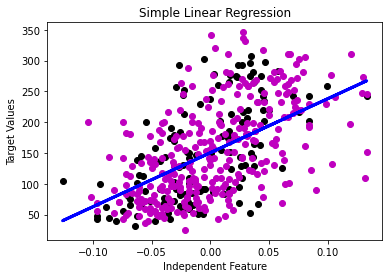

In [24]:
# Python code on sklearn linear regression example  
  
# Importing required libraries  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.datasets import load_diabetes  
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error, r2_score  
  
# Loading the sklearn diabetes dataset  
X, Y = load_diabetes(return_X_y=True)  
  
# Taking only one feature to perform simple linear regression  
X = X[:,8].reshape(-1,1)  
  
# Splitting the dependent and independent features of the dataset into training and testing dataset  
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 10 )  
  
# Creating an instance for the linear regression model of sklearn  
lr =LinearRegression()  
  
# Training the model by passing the dependent and independent features of the training dataset  
lr.fit( X_train, Y_train )  
  
# Creating an array of predictions made by the model for the unseen or test dataset  
Y_pred = lr.predict( X_test )  
  
# The value of the coefficients for the independent feature through the multiple regression model  
print("Value of the Coefficients: \n", lr.coef_)  
  
# The value of the mean squared error  
print(f"Mean square error: {mean_squared_error( Y_test, Y_pred)}")  
  
# The value of the coefficient of determination, i.e., R-square score of the model  
print(f"Coefficient of determination: {r2_score( Y_test, Y_pred )}")  
  
# Plotting the output  
plt.scatter(X_test, Y_test, color = "black", label = "original data")  
plt.scatter(X_train, Y_train, color = "m", label = "original data") 
plt.plot(X_test, Y_pred, color = "blue", linewidth=3, label = "regression line")  
plt.xlabel("Independent Feature")  
plt.ylabel("Target Values")  
plt.title("Simple Linear Regression")  
plt.show()

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
 

data = pd.read_csv("C:/Users/User4/Desktop/excels/Latest_Data_Science_Salaries.csv")
print(data.tail(1))

                 Job Title Employment Type Experience Level Expertise Level   
3299  Data Science Manager       Full-Time           Senior          Expert  \

       Salary Salary Currency Company Location  Salary in USD   
3299  7000000    Indian Rupee            India          94665  \

     Employee Residence Company Size  Year  
3299              India        Large  2021  
